# Price Action Analysis

### NIO

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [2]:
df = pd.read_csv('C:\\Users\\Galaxy Computers\\Downloads\\NIO.csv',parse_dates=['Date'])

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-10,13.66,13.73,13.02,13.28,13.28,48731700
1,2022-10-11,13.13,13.42,12.58,12.83,12.83,51761500
2,2022-10-12,12.93,13.46,12.48,12.88,12.88,50001300
3,2022-10-13,12.35,12.85,11.95,12.78,12.78,53451100
4,2022-10-14,12.99,13.18,11.73,11.75,11.75,59846600


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,2023-10-02,8.90,9.00,8.70,8.79,8.79,38390600
246,2023-10-03,8.55,8.76,8.54,8.61,8.61,27185700
247,2023-10-04,8.51,8.85,8.48,8.83,8.83,28056900
248,2023-10-05,8.66,8.71,8.51,8.66,8.66,21933500
249,2023-10-06,8.49,8.75,8.46,8.72,8.72,23293500


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,10.228400,10.524360,9.907520,10.210520,10.210520,5.467856e+07
std,1.725391,1.784945,1.618676,1.691831,1.691831,2.668063e+07
min,7.240000,7.540000,7.000000,7.410000,7.410000,2.045250e+07
25%,8.910000,9.122500,8.677500,8.912500,8.912500,3.746990e+07
50%,10.160000,10.440000,9.915000,10.175000,10.175000,4.871725e+07
75%,11.152500,11.562500,10.717500,11.085000,11.085000,6.320342e+07
max,15.860000,16.180000,14.730000,15.460000,15.460000,2.159358e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       250 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.8 KB


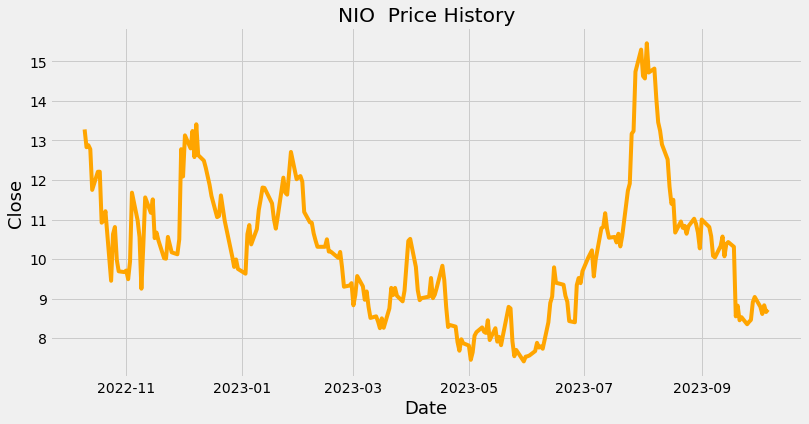

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'],color='orange')
plt.title('NIO  Price History')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)

plt.show()

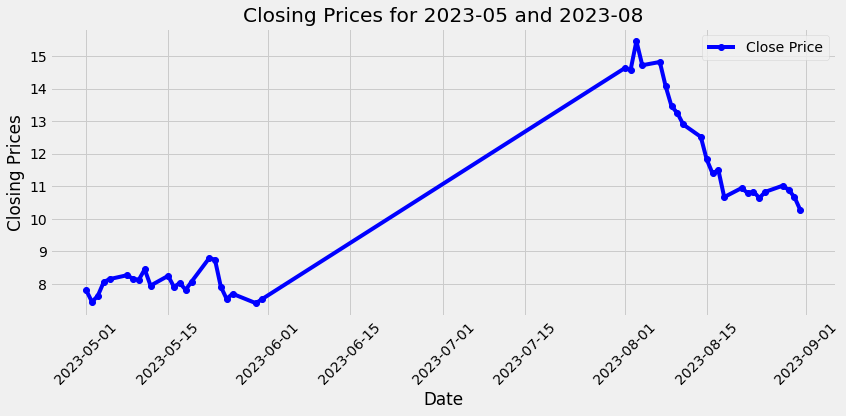

In [8]:
selected_years = ['2023-05', '2023-08']
filtered_df = df[df['Date'].dt.strftime('%Y-%m').isin(selected_years)]

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date'], filtered_df['Close'], marker='o', linestyle='-', color='b', label='Close Price')

plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('Closing Prices for 2023-05 and 2023-08')

plt.xticks(rotation=45)
plt.legend()
plt.grid(True) 
plt.tight_layout()  
plt.show()


In [9]:
data =df.filter(['Close'])
dataset = data.values
traning_data_len = math.ceil(len(dataset)*.8)
traning_data_len

200

In [10]:
#SclaScale the data
scale = MinMaxScaler(feature_range=(0,1))
scaled_data = scale.fit_transform(dataset)
scaled_data

array([[0.72919255],
       [0.67329193],
       [0.67950311],
       [0.66708075],
       [0.53913043],
       [0.59627329],
       [0.59627329],
       [0.43602484],
       [0.44223602],
       [0.47204969],
       [0.25341615],
       [0.4       ],
       [0.42236025],
       [0.31925466],
       [0.28322981],
       [0.28074534],
       [0.28571429],
       [0.25838509],
       [0.31428571],
       [0.53043478],
       [0.44347826],
       [0.39130435],
       [0.22857143],
       [0.36397516],
       [0.51552795],
       [0.46708075],
       [0.50931677],
       [0.38757764],
       [0.40496894],
       [0.38012422],
       [0.3242236 ],
       [0.32298137],
       [0.39130435],
       [0.34285714],
       [0.33664596],
       [0.38385093],
       [0.66708075],
       [0.58136646],
       [0.71055901],
       [0.66956522],
       [0.7242236 ],
       [0.64223602],
       [0.74534161],
       [0.6484472 ],
       [0.6310559 ],
       [0.60869565],
       [0.5826087 ],
       [0.555

In [11]:
train_data = scaled_data[0:traning_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <=60:
        print(x_train)
        print(y_train)
        print()

[array([0.72919255, 0.67329193, 0.67950311, 0.66708075, 0.53913043,
       0.59627329, 0.59627329, 0.43602484, 0.44223602, 0.47204969,
       0.25341615, 0.4       , 0.42236025, 0.31925466, 0.28322981,
       0.28074534, 0.28571429, 0.25838509, 0.31428571, 0.53043478,
       0.44347826, 0.39130435, 0.22857143, 0.36397516, 0.51552795,
       0.46708075, 0.50931677, 0.38757764, 0.40496894, 0.38012422,
       0.3242236 , 0.32298137, 0.39130435, 0.34285714, 0.33664596,
       0.38385093, 0.66708075, 0.58136646, 0.71055901, 0.66956522,
       0.7242236 , 0.64223602, 0.74534161, 0.6484472 , 0.6310559 ,
       0.60869565, 0.5826087 , 0.5552795 , 0.52049689, 0.45341615,
       0.45714286, 0.52173913, 0.48198758, 0.44223602, 0.32919255,
       0.29689441, 0.32049689, 0.29068323, 0.2757764 , 0.4       ])]
[0.4285714285714285]



In [12]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [13]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(140, 60, 1)

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))  # Added the missing closing parenthesis here
model.add(Dense(25))
model.add(Dense(1)) 
          

In [15]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [16]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

140/140 [==============================] - 13s 42ms/step - loss: 0.0158


In [17]:
test_data = scaled_data[traning_data_len - 60:, :]

x_test = []
y_test = dataset[traning_data_len:, :]  # Assuming dataset contains your target values

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

x_test = np.array(x_test)


In [18]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(50, 60, 1)

In [19]:
predict = model.predict(x_test)
predict = scale.inverse_transform(predict)

2/2 [==============================] - 2s 20ms/step


In [20]:
#let's get RMSE
rmse = np.sqrt(np.mean(predict-y_test)**2)
rmse 

0.11174495162963875

In [21]:
#Plot the data
train = data[:traning_data_len]
valid = data[traning_data_len:]
valid['predict'] = predict

C:\Users\Galaxy Computers\AppData\Local\Temp\ipykernel_4320\2808688855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predict'] = predict


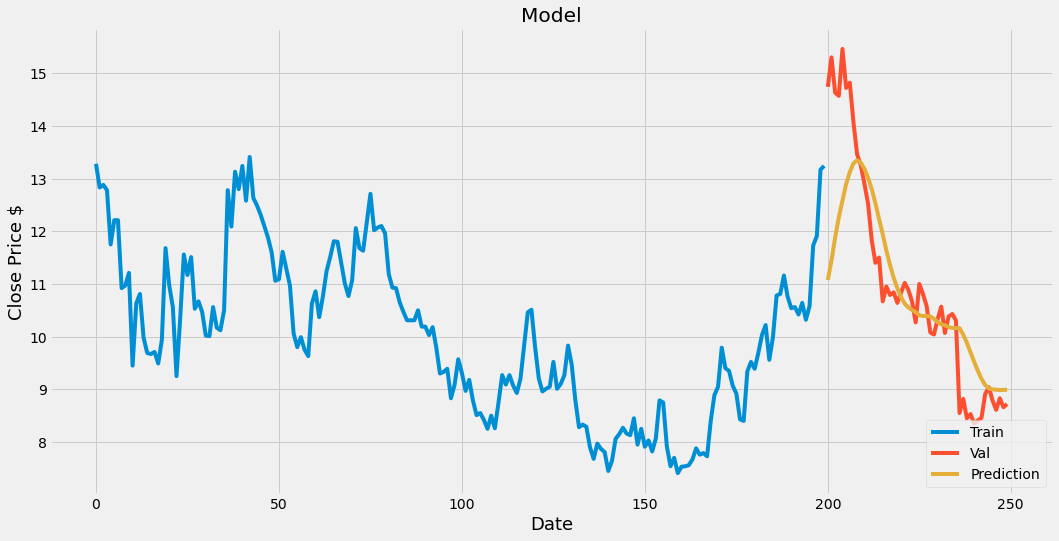

In [22]:
#Vizulation the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predict']])
plt.legend(['Train','Val','Prediction'], loc= 'lower right')